# Mean-Shift algorithm

## Problems

- Implement mean-shift algorithm
- Implement CAMSHIFT algorithm and compare the results with the MeanShift
- Develop tracking demo using your tracker and OpenCV’s counterpart and test on 5 datasets from http://cvlab.hanyang.ac.kr/tracker_benchmark/datasets.html
- Use MeanShift to cluster the data from here: https://cs.joensuu.fi/sipu/datasets/. Use G2 sets and S sets. Compare the data with ground truth.

## Problem 1. Implement Mean-Shift algorithm

The algorithm is implemented in the separate script in *helpers/mean_shift.py*. 

To run in just run *python mean_shift.py*. This will open your webcam and you can select the desired point of object to track. 

If you want to pass videofile to track object use *python mean_shift.py video_file_name*. It is important for videofile to be in the same directory or otherwise provide path to the videofile.

**How to reproduce:**
- Download video file or sequence of frames (packed in folder)
- If you have a video file that is in the same folder as the script just follow the instructions above 
- If you have a sequence of frames in the folder you should ensure that all frame image files follow the same image convention (for ex. 0001.jpg, 0002.jpg, ..., 1001.jpg).
- If your frame files follow the same convention you must pass an argument to the script with rejex. For the example from previous item you should use something like *"folder_name/%0**4**d.jpg"*, which shows that your files have **4** characters in name that are changing integers (the dataset linked at the beginning of notebook uses exactly this name convention).

You can see the demos of how implemented algorithm performs following the link: https://drive.google.com/drive/folders/1o0RMp4tAzHMzZnYp2-HeLnnkvM8i98Nv?usp=sharing

## Problem 2. Implement CAMSHIFT algorithm.

The algorithm is implemented in the separate script in *helpers/cam_shift.py*. 

To run in just run *python cam_shift.py*. This will open your webcam and you can select the desired point of object to track. 

If you want to pass videofile to track object use *python cam_shift.py video_file_name*. It is important for videofile to be in the same directory or otherwise provide path to the videofile.

**How to reproduce:**
The same logic as with mean-shift, except that you call other script

You can see the demos of how implemented algorithm performs following the link: 
https://drive.google.com/drive/folders/1hQMsj-s1qxHwrWNvjn_VRVGrFN1a2faq?usp=sharing

## Problem 3. Use Mean-Shift to cluster the data

In [66]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from itertools import cycle

In [77]:
%matplotlib inline

In [78]:
plt.style.use('seaborn-white')

In [34]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, 'data')
mean_shift_data_dir = os.path.join(data_dir, 'mean_shift_clustering')

print("Working directory %s" % work_dir)
print("Mean shift data dir %s" % mean_shift_data_dir)

Working directory /Users/olehmisko/Desktop/UCU docs/Computer-Vision-2019/computer-vision-hw/cv-3-0
Mean shift data dir /Users/olehmisko/Desktop/UCU docs/Computer-Vision-2019/computer-vision-hw/cv-3-0/data/mean_shift_clustering


In [46]:
def read_file(filename):
    data_path = os.path.join(mean_shift_data_dir, filename)
    file_data = []
    with open(data_path) as f:
        line = f.readline()
        while line:
            line_arr = line.strip().split()
            result_line = np.array(list(map(lambda x: int(x), line_arr)))
            file_data.append(result_line)
            line = f.readline()
    return np.array(file_data)

In [47]:
def get_dataframe(filename):
    """
    Returns Pandas DataFrame based on filename
    NOTE: File should be placed in mean_shift_data_dir
    
    Input: filename
    
    Output: pd.DataFrame
    """
    
    data_path = os.path.join(mean_shift_data_dir, filename)
    
    return pd.read_csv(data_path, sep="\t" , header=None, dtype = np.int32)

In [48]:
# Dictionary to contain pair of values and ground truth values filenames

g_set_val_gt_val = {'g2-2-20.txt': 'g2-2-20-gt.txt', 'g2-2-40.txt': 'g2-2-40-gt.txt',
                    'g2-2-60.txt': 'g2-2-60-gt.txt', 'g2-2-80.txt': 'g2-2-80-gt.txt',
                    'g2-2-100.txt': 'g2-2-100-gt.txt'}

s_set_val_gt_val = {'s1.txt': 's1-cb.txt', 's2.txt': 's2-cb.txt',
                    's3.txt': 's3-cb.txt', 's4.txt': 's4-cb.txt'}

In [95]:
def mean_shift_cluster(data_name, ground_truth_name, bandwidth = 50):
    X = read_file(data_name)
    y = read_file(ground_truth_name)
    
    model = MeanShift(bandwidth = bandwidth).fit(X)
    
    # Get labels and predicted cluster centers
    labels = model.labels_
    cluster_centers = model.cluster_centers_
    
    
    
    # Get only unique values 
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    
    # Create figure 
    fig = plt.figure(figsize=(15, 7))
    
    # Plot estimated values
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    fig.add_subplot(1, 2, 1)
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    for k, col in zip(range(n_clusters_), colors):
        my_members = labels == k
        cluster_center = cluster_centers[k]
        plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='white',
             markeredgecolor='k', markersize=14)
        
    # Plot ground truth
    fig.add_subplot(1, 2, 2)
    plt.title('Ground truth %d clusters' % len(y))
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    
    for k, col in zip(range(len(y)), colors):
        my_members = labels == k
        cluster_center = y[k]
        plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='white',
             markeredgecolor='k', markersize=14)
            
    
    plt.show()

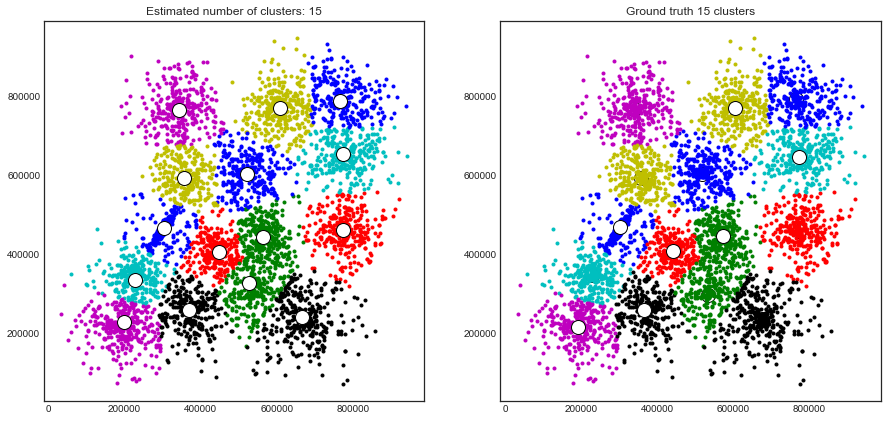

In [101]:
mean_shift_cluster('s3.txt', 's3-cb.txt', bandwidth = 75000)